In [174]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

In [175]:
iris = datasets.load_iris()
iris_data_frame = DataFrame()
iris_data_frame['sepal width'] = iris.data[:, 0]
iris_data_frame['sepal length'] = iris.data[:, 1] # we only take the first two features.
y = iris.target
print(iris_data_frame)

     sepal width  sepal length
0            5.1           3.5
1            4.9           3.0
2            4.7           3.2
3            4.6           3.1
4            5.0           3.6
..           ...           ...
145          6.7           3.0
146          6.3           2.5
147          6.5           3.0
148          6.2           3.4
149          5.9           3.0

[150 rows x 2 columns]


In [176]:
x_train, x_test, y_train, y_test = train_test_split(iris_data_frame, y, train_size = 0.8)
dtrain = xgb.DMatrix(x_train, label=y_train)
params = {'objective' : 'multi:softmax', 'num_class' : 3}
bst = xgb.train(params, dtrain)
dtest = xgb.DMatrix(x_train)
ypred = bst.predict(dtest)
print("Acuuracy of classification on test data is:", accuracy_score(ypred, y_train))

Acuuracy of classification on test data is: 0.9


In [177]:
#adding  more features to dataset
iris_data_frame['width/length'] = iris_data_frame['sepal width'] / iris_data_frame['sepal length']
iris_data_frame['|width - length|'] = np.abs(iris_data_frame['sepal width'] - iris_data_frame['sepal length'])
iris_data_frame['ln(width)'] = np.log(iris_data_frame['sepal length'])
iris_data_frame['ln(length)'] = np.log(iris_data_frame['sepal width'])
iris_data_frame['exp(width)'] = np.exp(iris_data_frame['sepal length'])
iris_data_frame['exp(length)'] = np.exp(iris_data_frame['sepal width'])

In [178]:
print(iris_data_frame)

     sepal width  sepal length  width/length  |width - length|  ln(width)  \
0            5.1           3.5      1.457143               1.6   1.252763   
1            4.9           3.0      1.633333               1.9   1.098612   
2            4.7           3.2      1.468750               1.5   1.163151   
3            4.6           3.1      1.483871               1.5   1.131402   
4            5.0           3.6      1.388889               1.4   1.280934   
..           ...           ...           ...               ...        ...   
145          6.7           3.0      2.233333               3.7   1.098612   
146          6.3           2.5      2.520000               3.8   0.916291   
147          6.5           3.0      2.166667               3.5   1.098612   
148          6.2           3.4      1.823529               2.8   1.223775   
149          5.9           3.0      1.966667               2.9   1.098612   

     ln(length)  exp(width)  exp(length)  
0      1.629241   33.115452   16

In [179]:
x_train, x_test = train_test_split(iris_data_frame, train_size = 0.8)
dtrain = xgb.DMatrix(x_train, label=y_train)
bst = xgb.train(params, dtrain)
dtest = xgb.DMatrix(x_train)
ypred = bst.predict(dtest)
print("Acuuracy of classification with added features is:", accuracy_score(ypred, y_train))

Acuuracy of classification with added features is: 0.8666666666666667


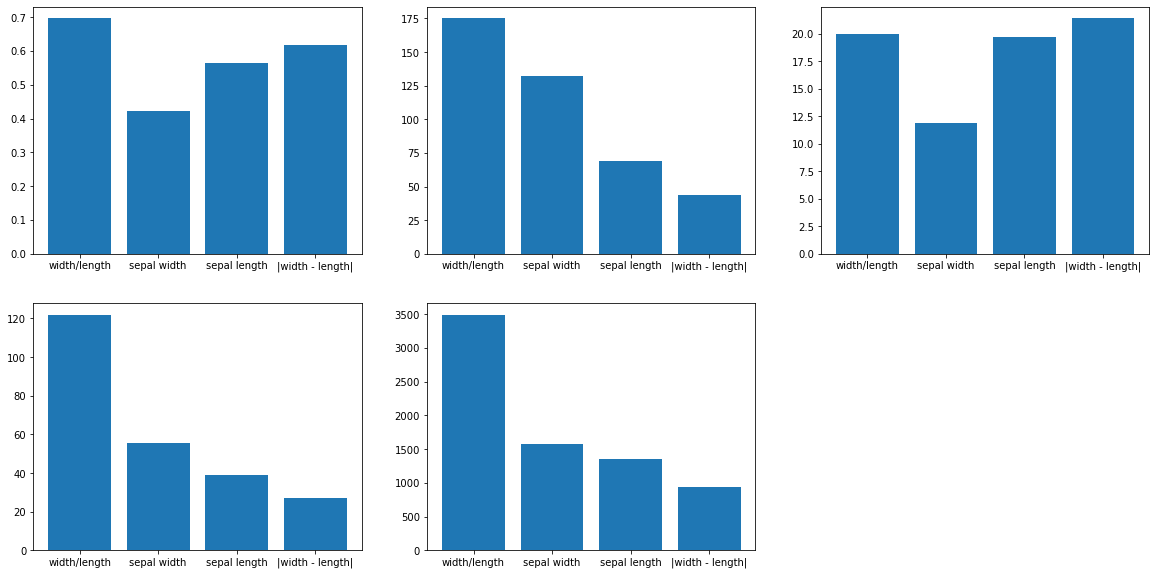

In [180]:
importance_gain = bst.get_score(fmap='', importance_type='gain')
importance_weight = bst.get_score(fmap='', importance_type='weight')
importance_cover = bst.get_score(fmap='', importance_type='cover')
importance_total_gain = bst.get_score(fmap='', importance_type='total_gain')
importance_total_cover = bst.get_score(fmap='', importance_type='total_cover')

plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.bar(importance_gain.keys(), importance_gain.values())
plt.subplot(232)
plt.bar(importance_weight.keys(), importance_weight.values())
plt.subplot(233)
plt.bar(importance_cover.keys(), importance_cover.values())
plt.subplot(234)
plt.bar(importance_total_gain.keys(), importance_total_gain.values())
plt.subplot(235)
plt.bar(importance_total_cover.keys(), importance_total_cover.values())
plt.show()

Feature selection can be benefitial for machiine learning tasks in many different ways <br>
<b>1. Understanding the problem.</b>
It is always interesting to find out what factors really matter while getting the result of an experiment.
It gives more deep understanding of the problem and can lead to some meaningful and valuable assumptions about the process you are investigating. <br>
<b>2. Making your model to fit and predict faster.</b>
It is obviouse that the lower the dimensionality of the data is, the faster algorythms fit and predict on that data.<br>
<b>3. Accuracy of predictions.</b>
Geting rid of unnecessary features gives additional accuracy to the prediction, because unnecessary features tend to distract your learning algorythm.